Amortizing Mortgage Loan - Debt Sizing

You consider to buy a new home for a Purchase Price of 400,000 USD. You have 150,000 USD in your savings account. Therefore, 

you require another 250,000 USD from a Bank (Amortizing Mortgage) to realize the Deal. Your local Bank quotes the following 

Mortgage terms:

Initial Loan Amount shall not exceed 75% of Purchase Price.

Fixed interest rate: 5.0% p.a. (compounded monthly)

Initial Term with fixed interest rate is 30 years

Outstanding Loan Amount after 30 Years shall not exceed 100,000 USD

Loan payments (interest & amortization) shall be made monthly in arrears

Monthly loan payments shall not exceed 1/3 of your current available monthly income of 4,800 USD

Calculate the effective annual interest rate.

Maximize the Loan Amount (and minimize the funding required from your savings account)!

Calculate interest component, amortization component and outstanding loan balance throughout the term and visualize!

In [7]:
import numpy as np
import numpy_financial as npf

In [4]:
m=12
pp=400000
r=0.05
maxLTV= 0.75
available_income= 4800
DSCR= 3/1
cf= -available_income/DSCR
n=30
pv=-100000

In [5]:
er=(1+r/m)**m-1
er

0.051161897881732976

In [6]:
cf

-1600.0

In [10]:
pv=npf.pv(rate=r/m,nper=n*m,pmt=cf,fv=-100000)
pv

320433.2468378557

we are eligible for a 320k loan
now to see if this loan doesnt exceed 75% of house' valuation we will ask the program to return the minimun value between 75% of price and PV

In [13]:
print(f'The initial loan amount is : {min(pv,pp*maxLTV)} USD')

The initial loan amount is : 300000.0 USD


AMORTIZING MORTGAGE LOAN:
INTEREST RATE
        
AMORTIZATION COMPONENT: REPAYMENT ON LOAN AND INTEREST
        
OUTSTANDING LOAN

In [14]:
m = 12
loan = 300000
r = 0.05
cf = -1600
n = 30

In [15]:
300000 * (1 + r/m) + cf


299650.0

In [16]:
300000 * r/m

1250.0

1250 IS THE INTEREST PAID OFF IN FIRST MONTH AND SO 350 WILL BE THE AMORTIZATION AMOUNT

In [17]:
(300000 * (1 + r/m) + cf) * (1 + r/m) + cf

299298.5416666667

this is the money remaining after second month 

In [18]:
npf.fv(rate = r/m, nper = n*m, pmt = cf, pv = loan)

-8709.477623486891

this is the amount remaining after 30 years of payment

In [19]:
final_balance = npf.fv(rate = r/m, nper = n*m, pmt = cf, pv = loan)
final_balance

-8709.477623486891

In [20]:
range(n*m + 1)

range(0, 361)

In [21]:
rem_loan = npf.fv(rate = r/m, nper = range(n*m + 1), pmt = cf, pv = loan)
rem_loan

array([-300000.        , -299650.        , -299298.54166667,
       -298945.61892361, -298591.22566913, -298235.35577608,
       -297878.00309181, -297519.16143803, -297158.82461069,
       -296796.9863799 , -296433.64048982, -296068.78065852,
       -295702.40057793, -295334.49391368, -294965.05430498,
       -294594.07536459, -294221.55067861, -293847.47380643,
       -293471.83828063, -293094.6376068 , -292715.86526349,
       -292335.51470209, -291953.57934668, -291570.05259396,
       -291184.9278131 , -290798.19834566, -290409.85750543,
       -290019.89857837, -289628.31482244, -289235.09946754,
       -288840.24571532, -288443.74673913, -288045.59568388,
       -287645.7856659 , -287244.30977284, -286841.16106356,
       -286436.33256799, -286029.81728702, -285621.60819238,
       -285211.69822652, -284800.08030246, -284386.74730372,
       -283971.69208416, -283554.90746784, -283136.38624896,
       -282716.12119166, -282294.10502996, -281870.33046758,
       -281444.79017786,

loans remaining each month in form of array

In [22]:
npf.ppmt(rate = r/m, per = 1, nper = n*m, pv = loan, fv = final_balance)

-350.0000000000002

as deduced above 350 was the first month amortization

In [23]:
amort = npf.ppmt(rate = r/m, per = range(1, n*m + 1), nper = n*m, pv = loan, fv = final_balance)
amort

array([ -350.        ,  -351.45833333,  -352.92274306,  -354.39325448,
        -355.86989305,  -357.35268427,  -358.84165378,  -360.33682734,
        -361.83823079,  -363.34589008,  -364.85983129,  -366.38008059,
        -367.90666426,  -369.43960869,  -370.9789404 ,  -372.52468598,
        -374.07687217,  -375.63552581,  -377.20067383,  -378.77234331,
        -380.3505614 ,  -381.93535541,  -383.52675272,  -385.12478086,
        -386.72946745,  -388.34084023,  -389.95892706,  -391.58375592,
        -393.21535491,  -394.85375222,  -396.49897619,  -398.15105525,
        -399.81001798,  -401.47589306,  -403.14870928,  -404.82849557,
        -406.51528097,  -408.20909464,  -409.90996587,  -411.61792406,
        -413.33299874,  -415.05521957,  -416.78461632,  -418.52121888,
        -420.2650573 ,  -422.0161617 ,  -423.77456238,  -425.54028972,
        -427.31337426,  -429.09384665,  -430.88173768,  -432.67707825,
        -434.47989941,  -436.29023233,  -438.10810829,  -439.93355875,
      

amortization increases every month with interest payments decreasing as the list suggests 

In [24]:
interest = npf.ipmt(rate = r/m, per = range(1, n*m + 1), nper = n*m, pv = loan, fv = final_balance)
interest

array([-1250.        , -1248.54166667, -1247.07725694, -1245.60674552,
       -1244.13010695, -1242.64731573, -1241.15834622, -1239.66317266,
       -1238.16176921, -1236.65410992, -1235.14016871, -1233.61991941,
       -1232.09333574, -1230.56039131, -1229.0210596 , -1227.47531402,
       -1225.92312783, -1224.36447419, -1222.79932617, -1221.22765669,
       -1219.6494386 , -1218.06464459, -1216.47324728, -1214.87521914,
       -1213.27053255, -1211.65915977, -1210.04107294, -1208.41624408,
       -1206.78464509, -1205.14624778, -1203.50102381, -1201.84894475,
       -1200.18998202, -1198.52410694, -1196.85129072, -1195.17150443,
       -1193.48471903, -1191.79090536, -1190.09003413, -1188.38207594,
       -1186.66700126, -1184.94478043, -1183.21538368, -1181.47878112,
       -1179.7349427 , -1177.9838383 , -1176.22543762, -1174.45971028,
       -1172.68662574, -1170.90615335, -1169.11826232, -1167.32292175,
       -1165.52010059, -1163.70976767, -1161.89189171, -1160.06644125,
      

In [25]:
amort + interest

array([-1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
       -1600., -1600., -1600., -1600., -1600., -1600., -1600., -1600.,
      

In [26]:
import matplotlib.pyplot as plt

[]

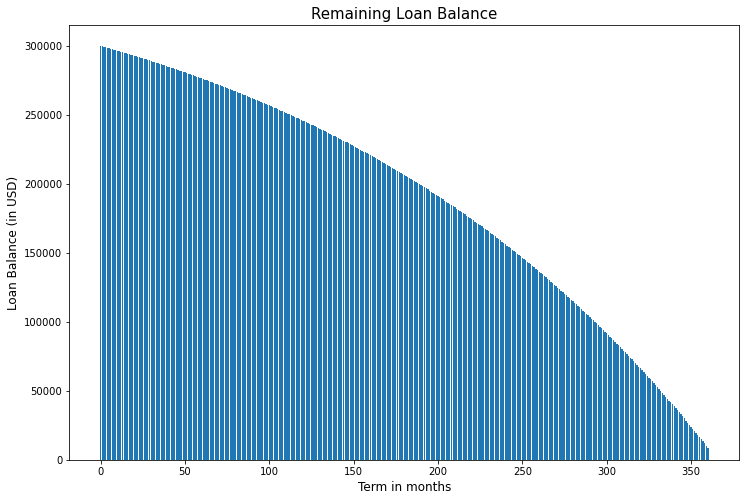

In [27]:
plt.figure(figsize = (12, 8))
plt.bar(range(0, n*m + 1), -rem_loan)
plt.title("Remaining Loan Balance", fontsize = 15)
plt.xlabel("Term in months", fontsize = 12)
plt.ylabel("Loan Balance (in USD)", fontsize = 12)
plt.plot()

[]

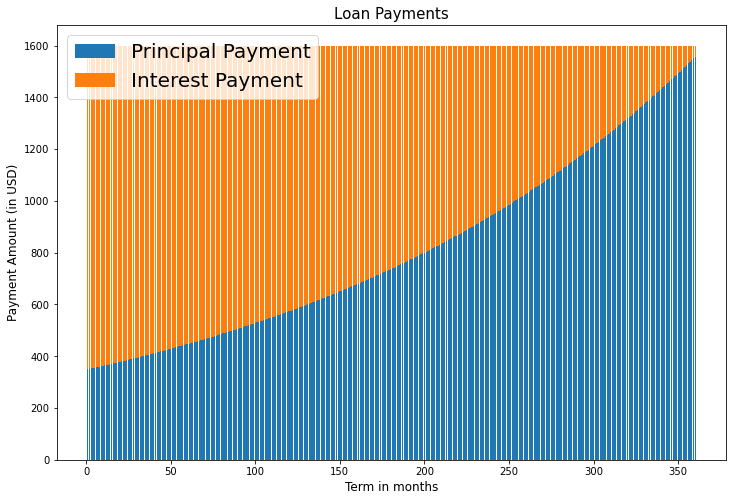

In [28]:
plt.figure(figsize = (12, 8))
plt.bar(range(1, n*m + 1), -amort, label = "Principal Payment")
plt.bar(range(1, n*m + 1), -interest, bottom = -amort, label = "Interest Payment")
plt.legend(fontsize = 20)
plt.title("Loan Payments", fontsize = 15)
plt.xlabel("Term in months", fontsize = 12)
plt.ylabel("Payment Amount (in USD)", fontsize = 12)
plt.plot()